# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Loading the Train Dataset

In [2]:
train=pd.read_csv("C:/Users/VinoSekar-VP/Desktop/kaggle/Internship/Dataset/credit card fraud detection/fraudTrain.csv")

# Display the few rows of the dataset

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Checking the information of the Train Dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Loading the test Dataset

In [7]:
test=pd.read_csv("C:/Users/VinoSekar-VP/Desktop/kaggle/Internship/Dataset/credit card fraud detection/fraudTest.csv")

# Display the first few rows of the test dataset

In [8]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [11]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
train.dropna(inplace=True)
test.dropna(inplace=True)

# Checking the duplicate values

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

# Visualise the distribution of the target variable(fraudulent or not)

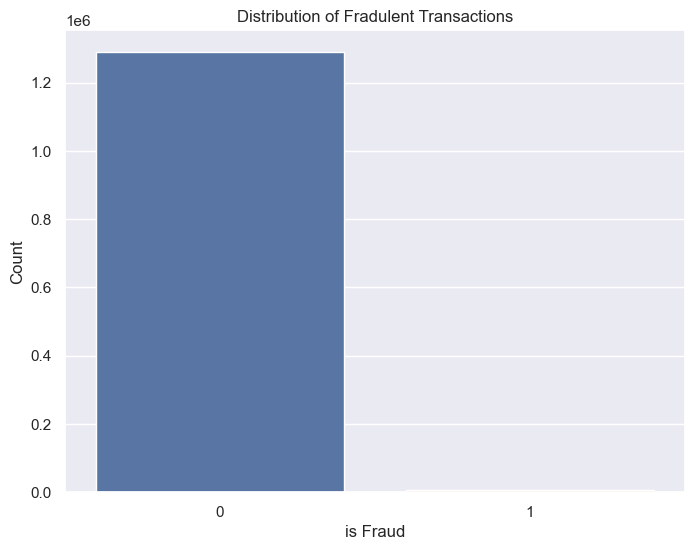

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='is_fraud',data=train)
plt.title('Distribution of Fradulent Transactions')
plt.xlabel('is Fraud')
plt.ylabel('Count')
plt.show()

# Visualise the distribution of Transaction Amount by fraud status

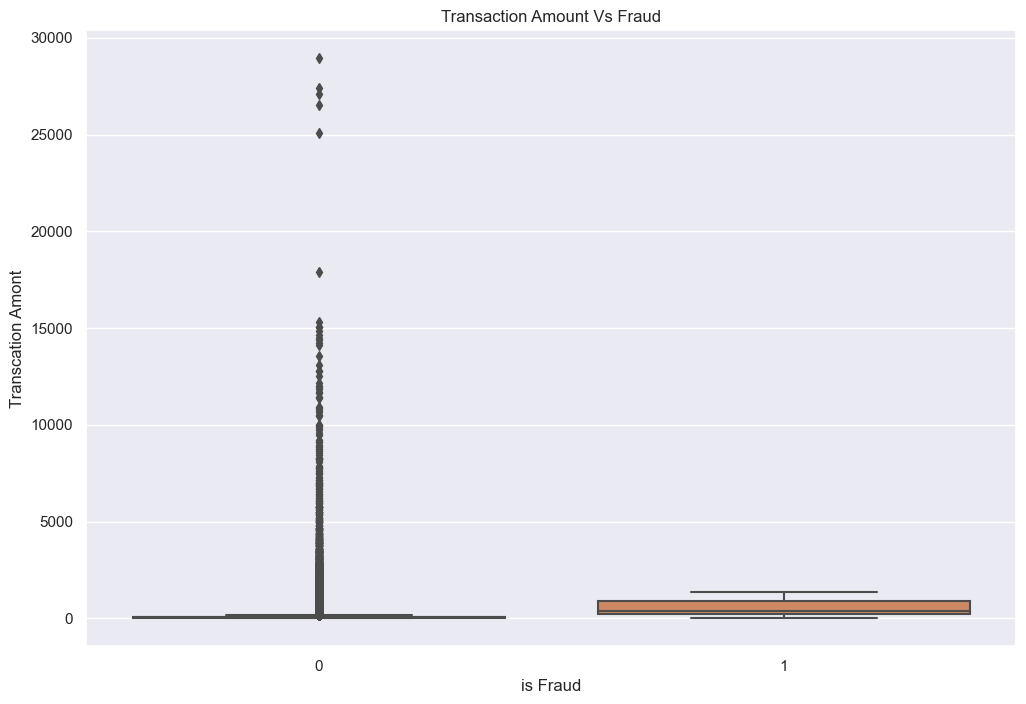

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='is_fraud',y='amt',data=train)
plt.title('Transaction Amount Vs Fraud')
plt.xlabel('is Fraud')
plt.ylabel('Transcation Amont')
plt.show()

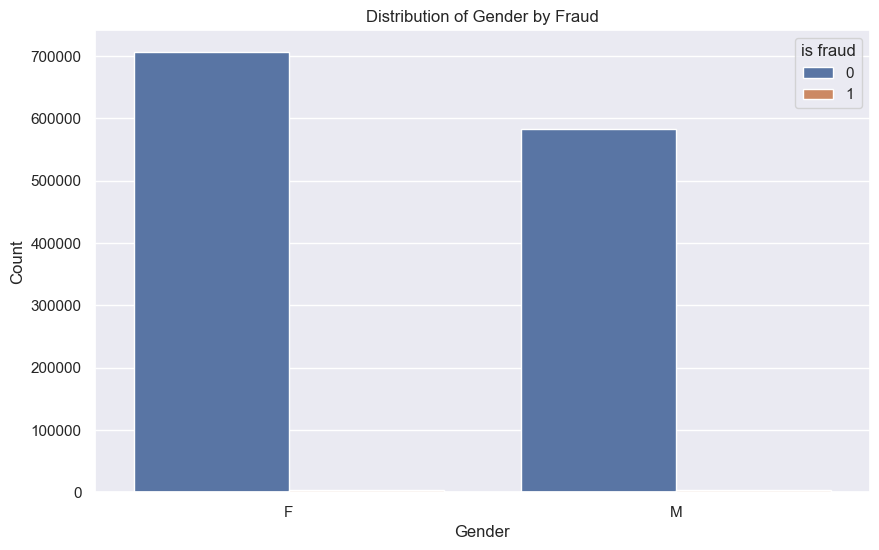

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='is_fraud',data=train)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='is fraud')
plt.show()

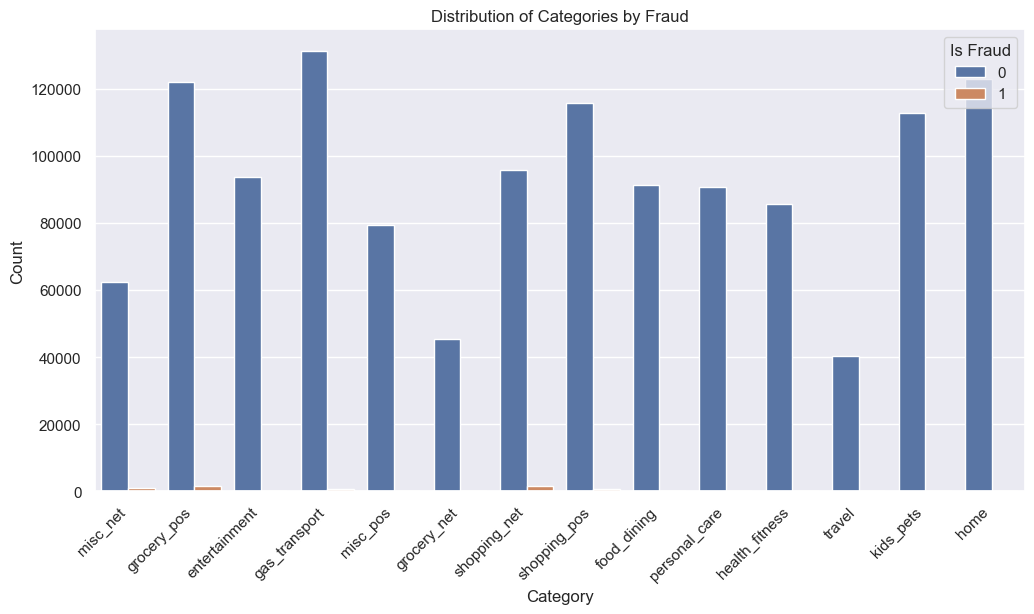

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',hue='is_fraud',data=train)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.legend(title='Is Fraud')
plt.show()

# Extract Hours and Days from trans_date_trans_time

In [19]:
train['trans_hour']=pd.to_datetime(train['trans_date_trans_time']).dt.hour
train['trans_day']=pd.to_datetime(train['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution by Fraud

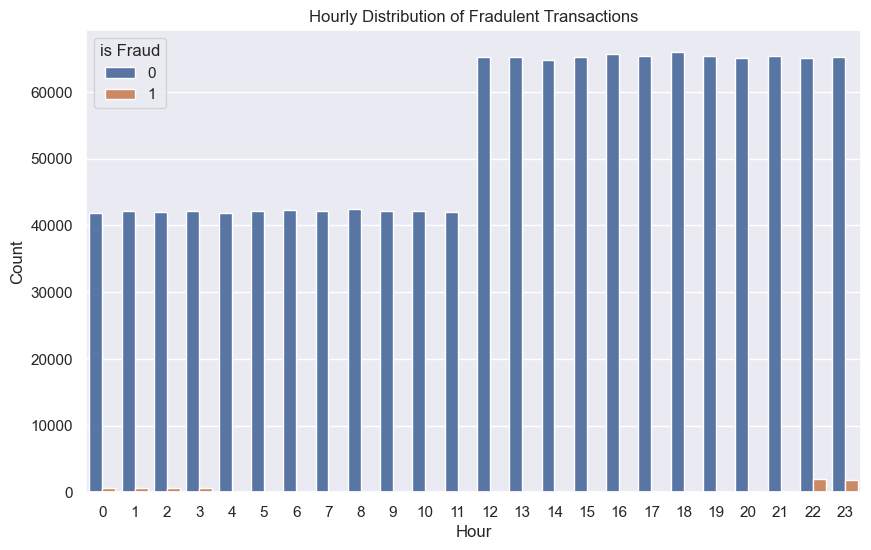

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='trans_hour',hue='is_fraud',data=train)
plt.title('Hourly Distribution of Fradulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='is Fraud')
plt.show()

# Plot Day Wise Distribution of Fraud

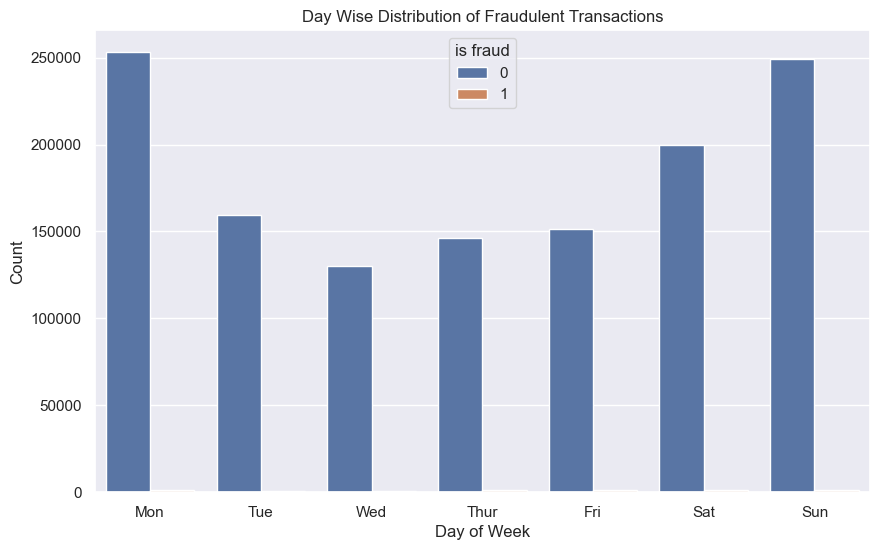

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='trans_day',hue='is_fraud',data=train)
plt.title('Day Wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.legend(title='is fraud')
plt.show()

# Scatter Plot of Geographical data

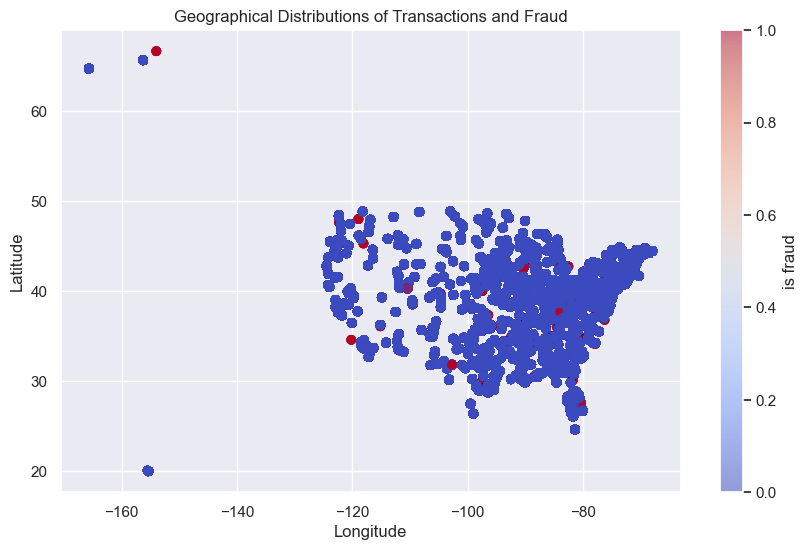

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(train['long'],train['lat'],c=train['is_fraud'],cmap='coolwarm',alpha=0.5)
plt.title('Geographical Distributions of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='is fraud')
plt.show()

# Transaction Frequency Analysis

<Figure size 1000x600 with 0 Axes>

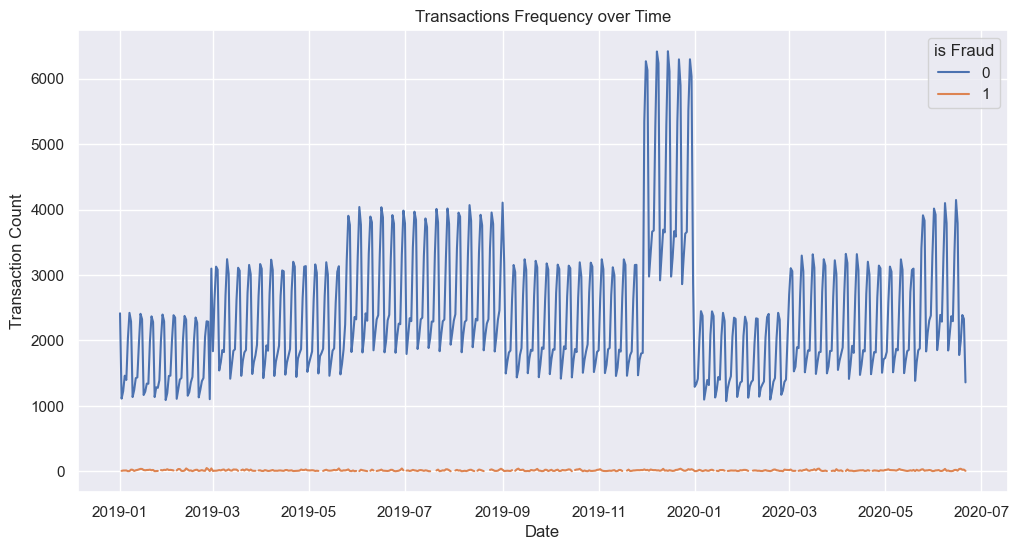

In [23]:
plt.figure(figsize=(10,6))
train['trans_data_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_data_trans_time'].dt.date
transaction_counts=train.groupby(['trans_date','is_fraud']).size().unstack()
transaction_counts.plot(kind='line',figsize=(12,6))
plt.title('Transactions Frequency over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='is Fraud')
plt.show()

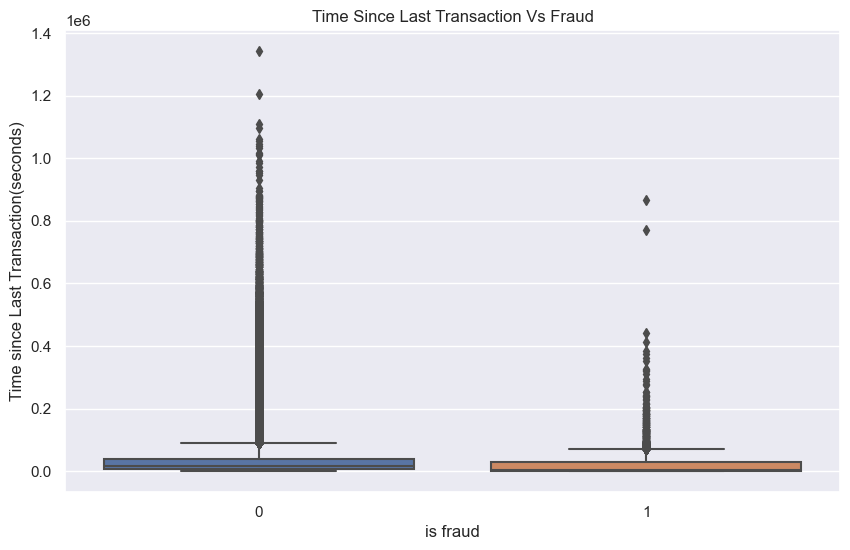

In [24]:
train['time_since_last_transaction']=train.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10,6))
sns.boxplot(x='is_fraud',y='time_since_last_transaction',data=train)
plt.title('Time Since Last Transaction Vs Fraud')
plt.xlabel('is fraud')
plt.ylabel('Time since Last Transaction(seconds)')
plt.show()

# Transaction Amount by Category

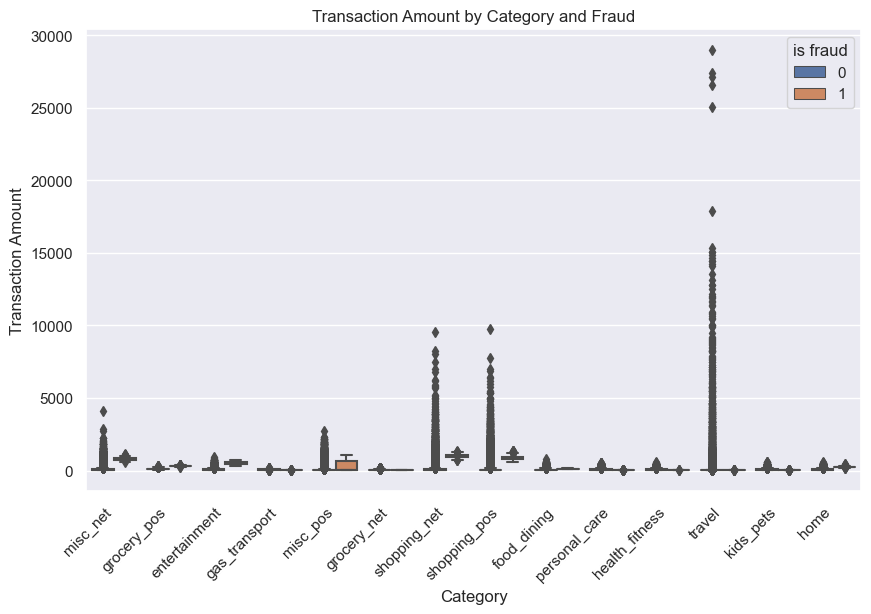

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='amt',hue='is_fraud',data=train)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45,ha="right")
plt.legend(title='is fraud')
plt.show()

# Transaction Amount by City Population

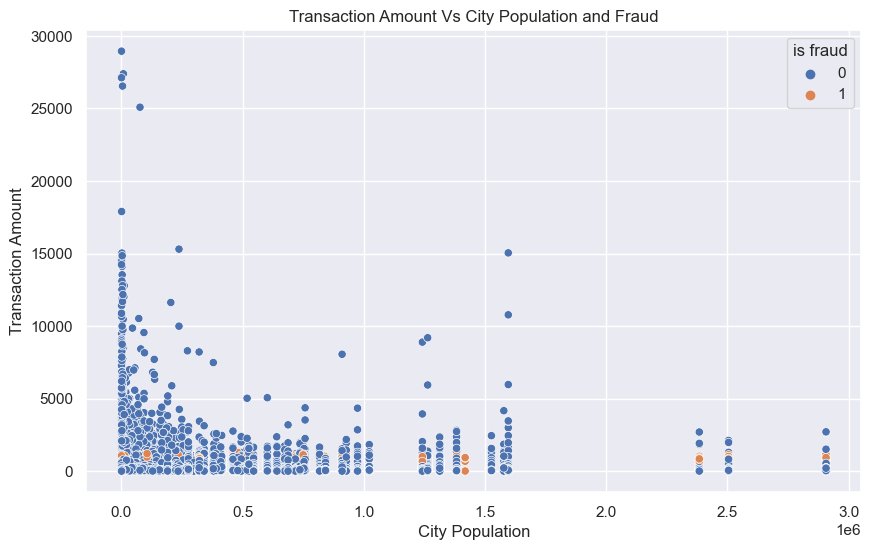

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='city_pop',y='amt',hue='is_fraud',data=train)
plt.title('Transaction Amount Vs City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='is fraud')
plt.show()

# Transaction Frequency by Card Number

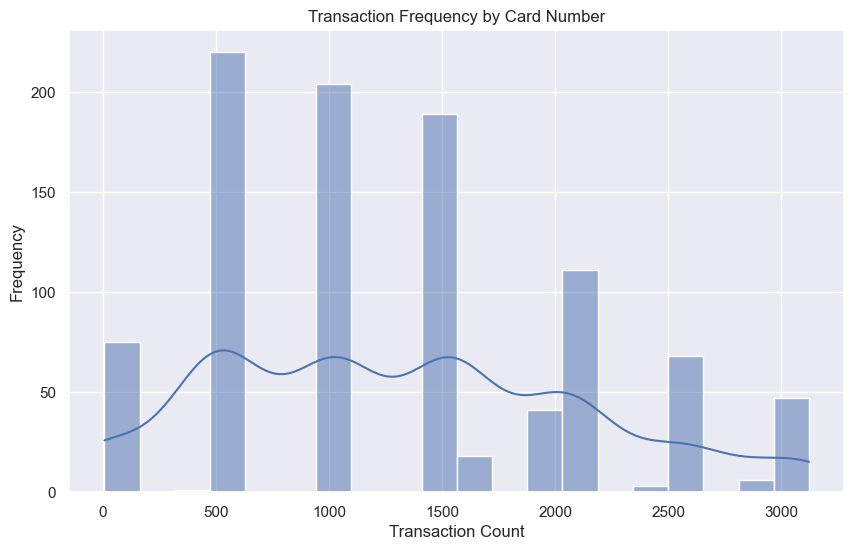

In [27]:
card_transaction_counts=train['cc_num'].value_counts()
plt.figure(figsize=(10,6))
sns.histplot(card_transaction_counts,bins=20,kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

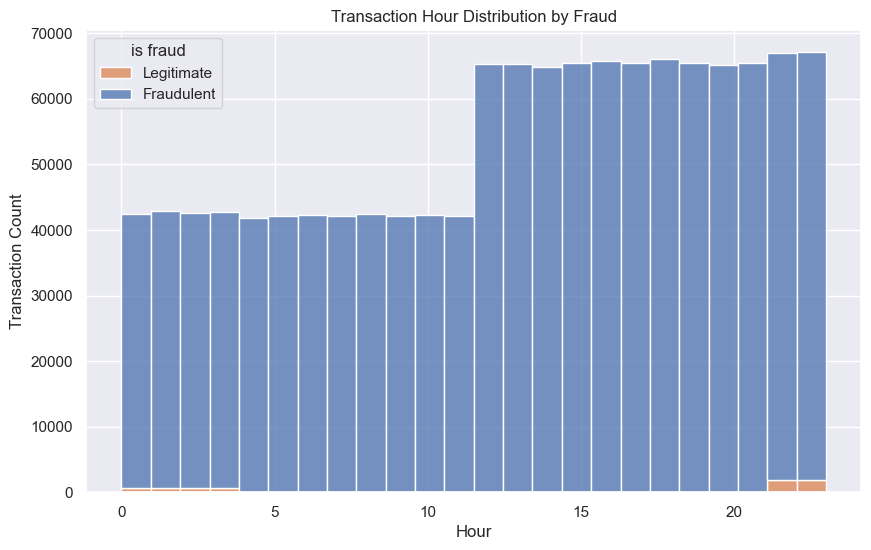

In [28]:
train['trans_hour']=pd.to_datetime(train['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='trans_hour',hue='is_fraud',multiple='stack',bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='is fraud',labels=['Legitimate','Fraudulent'])
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Encode categorical Variables

In [30]:
encoder=OneHotEncoder(drop='first')
categorical_cols=['gender','category','state']
encoded_train_features=encoder.fit_transform(train[categorical_cols]).toarray()
encoded_test_features=encoder.transform(test[categorical_cols]).toarray()

# Feature Scaling

In [31]:
scaler=StandardScaler()
numerical_cols=['amt','lat','long','city_pop','unix_time','merch_lat','merch_long']
scaled_train_features=scaler.fit_transform(train[numerical_cols])
scaled_test_features=scaler.transform(test[numerical_cols])

# Concatenate encoded and scaled features for both train and test dataset

In [32]:
final_train_features=pd.concat([pd.DataFrame(encoded_train_features),pd.DataFrame(scaled_train_features)],axis=1)
final_test_features=pd.concat([pd.DataFrame(encoded_test_features),pd.DataFrame(scaled_test_features)],axis=1)

# Define Target Variables

In [33]:
train_target=train['is_fraud']
test_target=test['is_fraud']

# Generating synthetic data to balance the imbalanced dataset

In [34]:
smote=SMOTE(random_state=36)
x_train_resample,y_train_resample=smote.fit_resample(final_train_features,train_target)
print('Current of the Training Set:',len(y_train_resample))

Current of the Training Set: 2578338


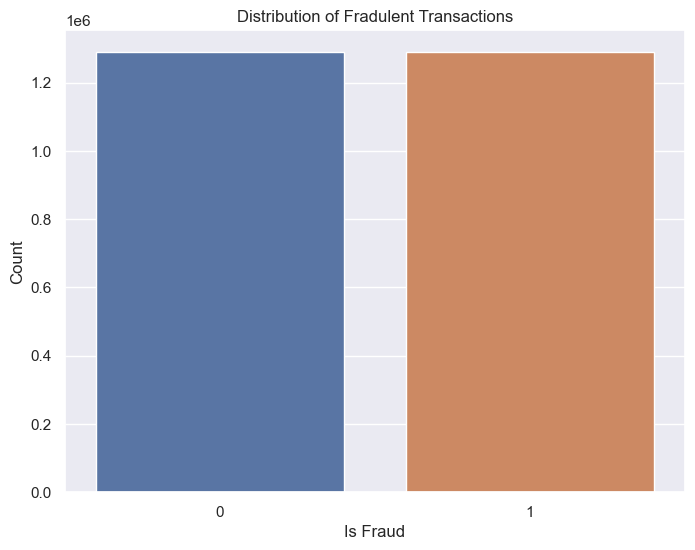

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_resample)
plt.title('Distribution of Fradulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [36]:
x_shuffled,y_shuffled=shuffle(x_train_resample,y_train_resample,random_state=42)
x_train,x_validation,y_train,y_validation=train_test_split(x_shuffled,y_shuffled,test_size=0.5)

In [37]:
x_train_copy=x_train
y_train_copy=y_train
x_train=x_train[:10000]
y_train=y_train[:10000]

# Predict,evaluate and train the Logistic Regression

In [38]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)
lg_predictions=lg_model.predict(x_validation)
lg_accuracy=accuracy_score(y_validation,lg_predictions)
print("Logistic Regression Accuracy:{:.3f}%".format(lg_accuracy*100))

Logistic Regression Accuracy:81.649%


# Calculate ROC and AUC Curve

In [39]:
probs=lg_model.predict_proba(x_validation)[:, 1]
fpr,tpr,thresholds=roc_curve(y_validation,probs)
roc_auc=auc(fpr,tpr)

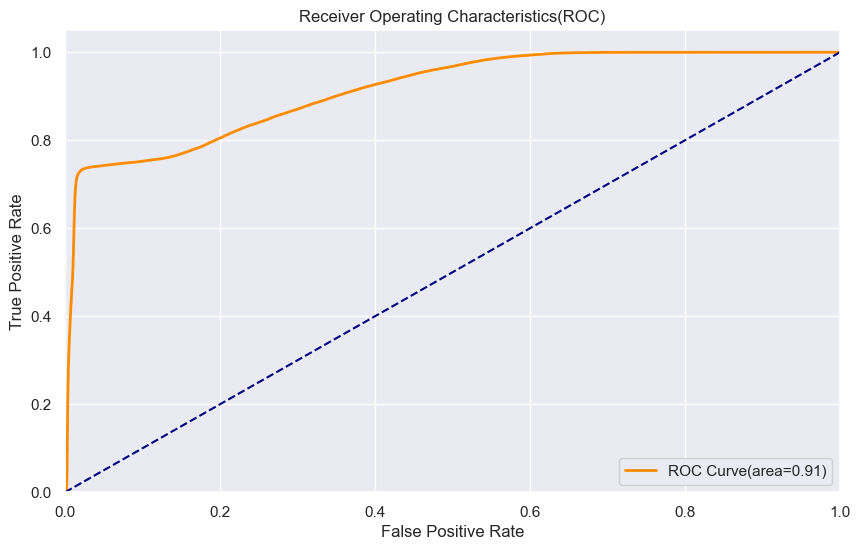

In [40]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot the confusion matrix

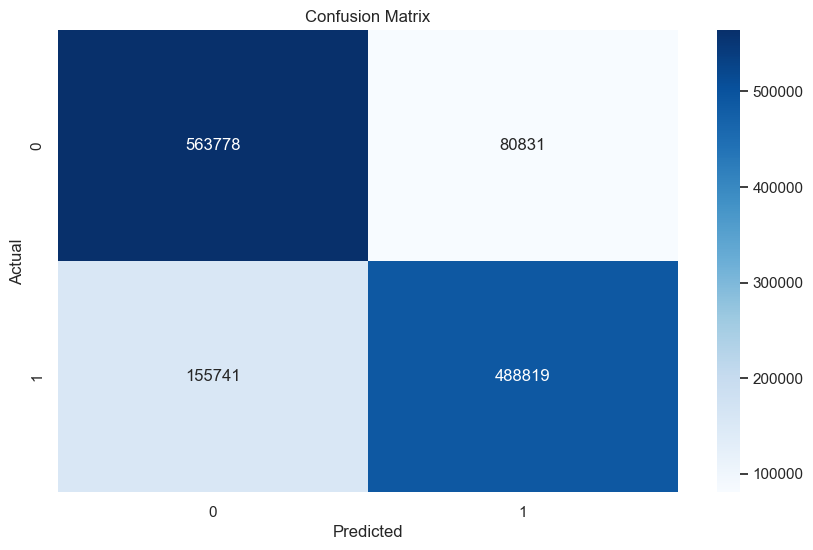

In [41]:
conf_matrix=confusion_matrix(y_validation,lg_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
from sklearn.svm import SVC
svm_model=SVC(kernel='poly')
svm_model.fit(x_train,y_train)

SVC(kernel='poly')

# Predict and evaluate the SVM Model

In [43]:
svm_predictions=svm_model.predict(x_validation)
svm_accuracy=accuracy_score(y_validation,svm_predictions)
print("SVM Accuracy:{:.3f}%".format(svm_accuracy*100))

SVM Accuracy:86.167%


In [44]:
decision_scores=svm_model.decision_function(final_test_features)
fpr,tpr,thresholds=roc_curve(test_target,decision_scores)
roc_auc=auc(fpr,tpr)

# Plot ROC Curve

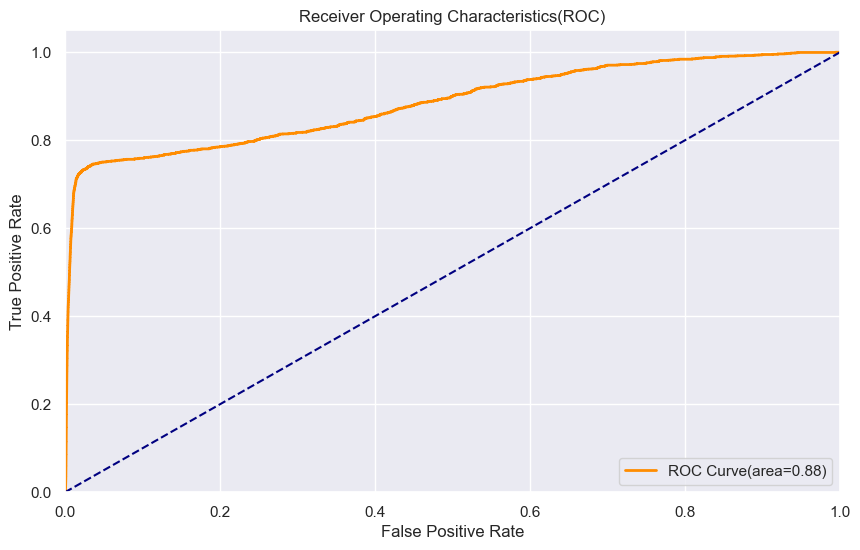

In [45]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot and calculate the confusion matrix

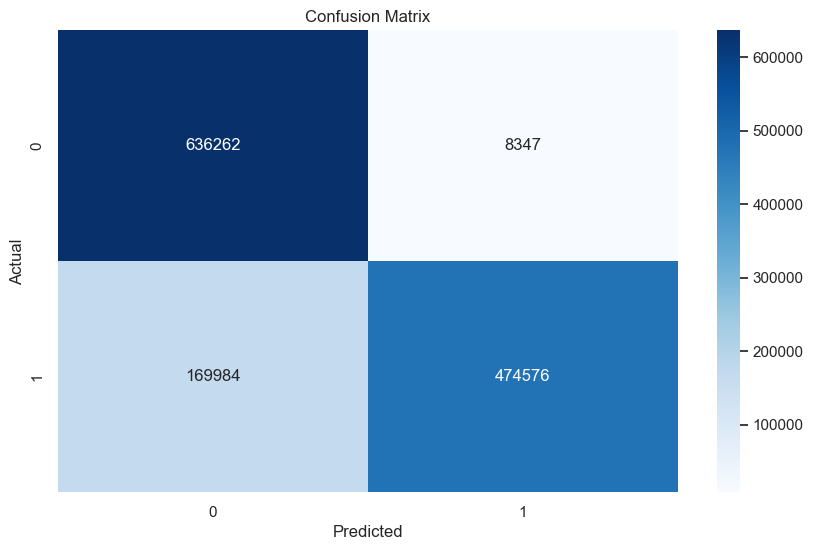

In [46]:
conf_matrix=confusion_matrix(y_validation,svm_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

# predict and evaluate the KNN model

In [48]:
knn_predictions=knn_model.predict(x_validation)
knn_accuracy=accuracy_score(y_validation,knn_predictions)
print("KNN Accuracy:{:.3f}%".format(knn_accuracy*100))

KNN Accuracy:87.941%


In [49]:
probs=knn_model.predict_proba(x_validation)[:, 1]
fpr,tpr,thresholds=roc_curve(y_validation,probs)
roc_auc=auc(fpr,tpr)

# Plot ROC Curve

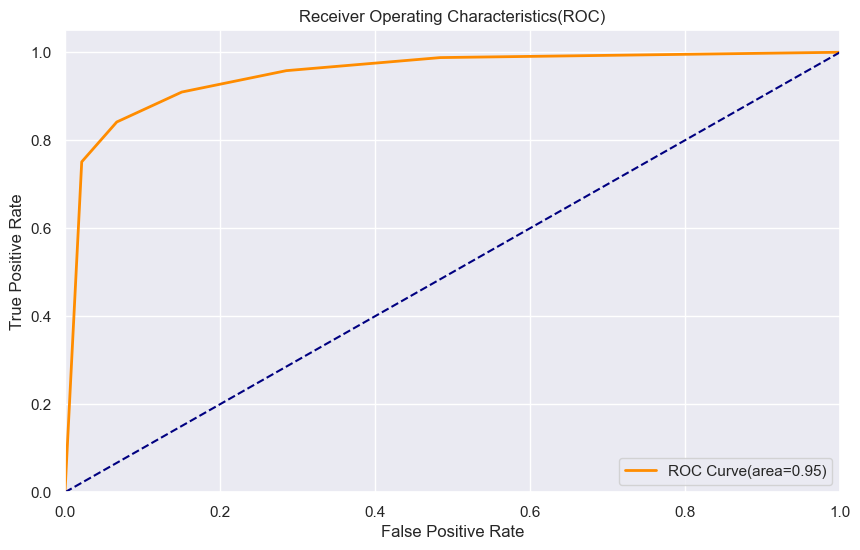

In [50]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot and calculate the confusion matrix

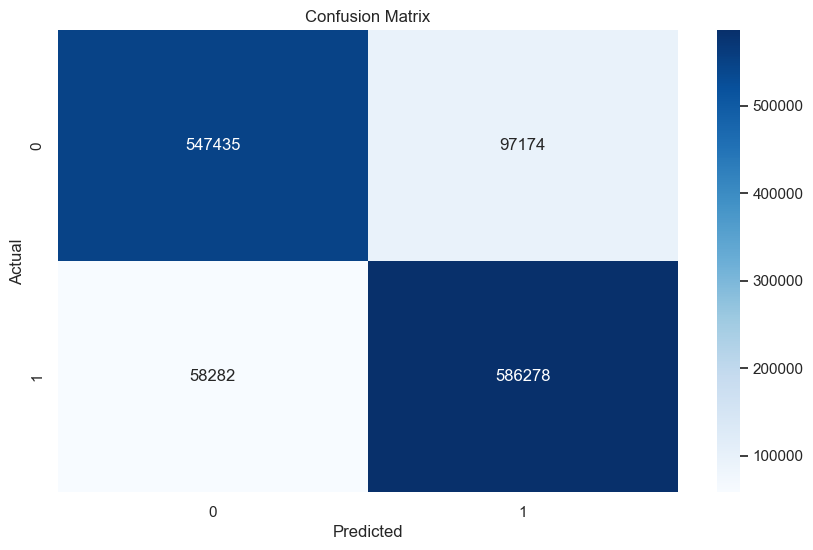

In [51]:
conf_matrix=confusion_matrix(y_validation,knn_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

# Predict and evaluate the random forest

In [53]:
rf_predictions=rf_model.predict(x_validation)
rf_accuracy=accuracy_score(y_validation,rf_predictions)
print("Random Forest Accuracy:{:.3f}%".format(rf_accuracy*100))

Random Forest Accuracy:97.735%


In [54]:
probs=rf_model.predict_proba(x_validation)[:, 1]
fpr,tpr,thresholds=roc_curve(y_validation,probs)
roc_auc=auc(fpr,tpr)

# Plot ROC Curve

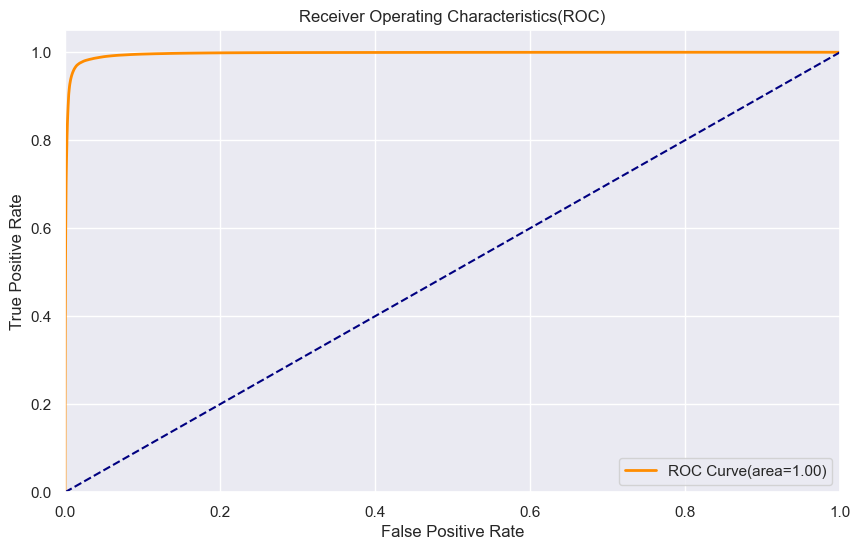

In [55]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot and calculate the confusion matrix

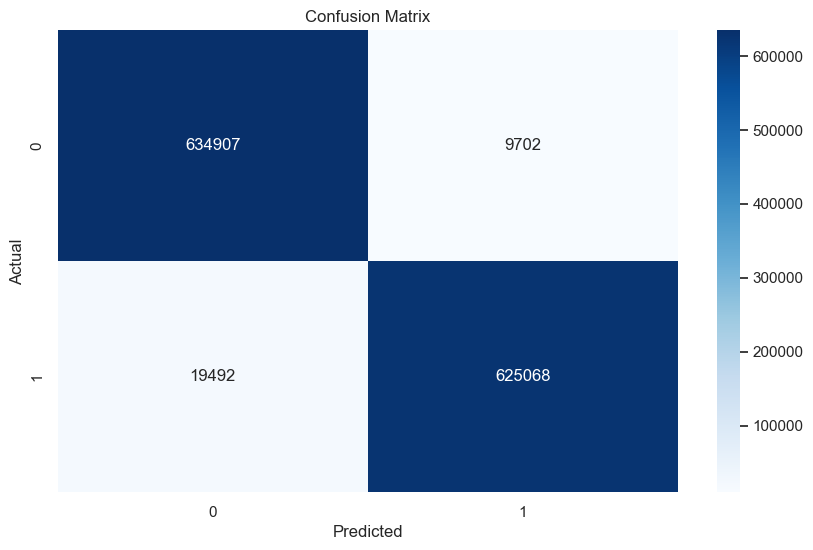

In [56]:
conf_matrix=confusion_matrix(y_validation,rf_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.linear_model import SGDClassifier
sgd_model=SGDClassifier(random_state=42)
sgd_model.fit(x_train,y_train)

SGDClassifier(random_state=42)

# Predict and evalauate the SGD Classifier

In [58]:
sgd_predictions=sgd_model.predict(x_validation)
sgd_accuracy=accuracy_score(y_validation,sgd_predictions)
print("SGDClassifier Accuracy:{:.3f}%".format(sgd_accuracy*100))

SGDClassifier Accuracy:86.043%


In [59]:
decision_scores=sgd_model.decision_function(x_validation)
fpr,tpr,thresholds=roc_curve(y_validation,decision_scores)
roc_auc=auc(fpr,tpr)

# Plot ROC Curve

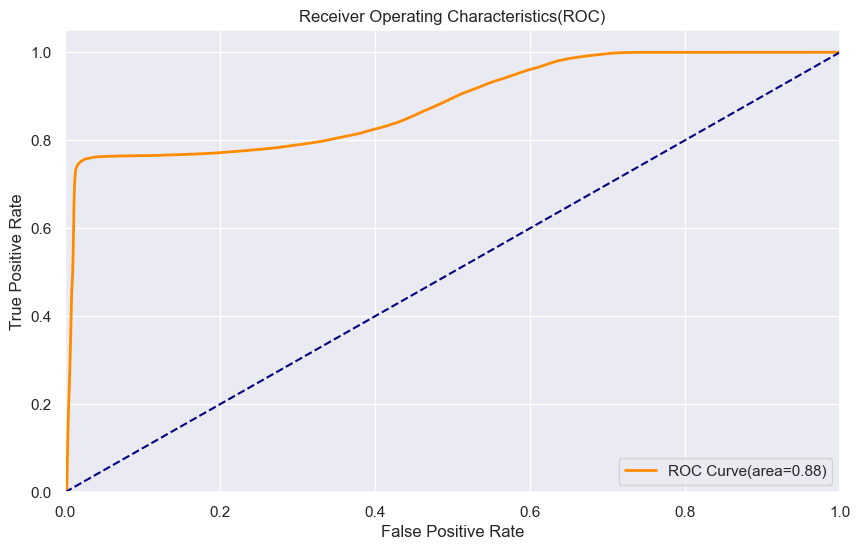

In [60]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot and calculate the confusion matrix

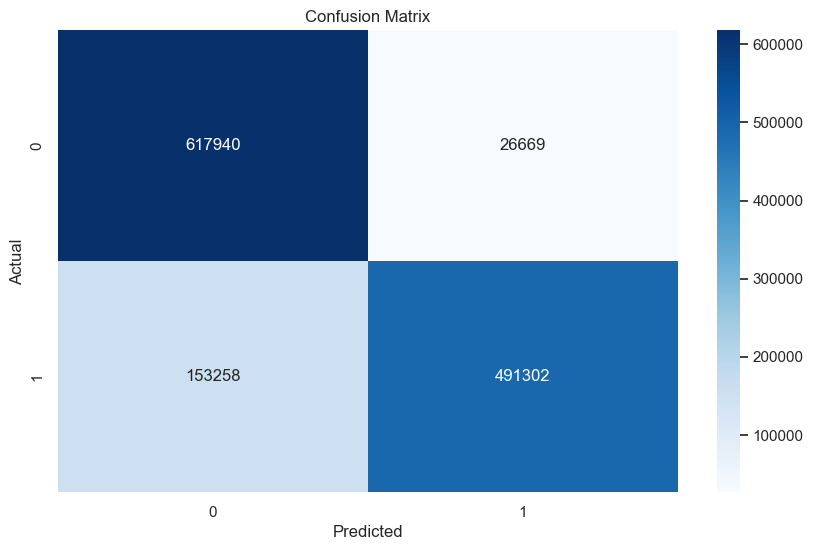

In [61]:
conf_matrix=confusion_matrix(y_validation,sgd_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score
model_names=['Logistic Regression','SVM','KNN','Random Forest','SGD']
model_instances=[lg_model,svm_model,knn_model,rf_model,sgd_model]

# Initialize the lists to store accuracy and ROC Curves

In [63]:
accuracy_scores=[]
roc_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

# Calculate accuracy and ROC scores for each model

In [64]:
for model in model_instances:
    predictions=model.predict(final_test_features)
    accuracy=accuracy_score(test_target,predictions)
    roc_score=roc_auc_score(test_target,predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target,predictions))
    precision_scores.append(precision_score(test_target,predictions))
    recall_scores.append(recall_score(test_target,predictions))

# Create a Dataframe to compare results

In [65]:
results_df=pd.DataFrame({
    'Model':model_names,
    'Accuracy':accuracy_scores,
    'ROC Score':roc_scores,
    'F1 Score':f1_scores,
    'Precision_Score':precision_scores,
    'Recall_Score':recall_scores,
})

print(results_df)

                 Model  Accuracy  ROC Score  F1 Score  Precision_Score  \
0  Logistic Regression  0.907720   0.820632  0.057767         0.030068   
1                  SVM  0.972193   0.853922  0.169417         0.095747   
2                  KNN  0.832091   0.810535  0.034997         0.017895   
3        Random Forest  0.984906   0.918817  0.303554         0.184665   
4                  SGD  0.951121   0.851240  0.105980         0.057015   

   Recall_Score  
0      0.732867  
1      0.734732  
2      0.788811  
3      0.852214  
4      0.750583  
